In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

# EDA

In [2]:
data = pd.read_csv('Customer-Churn/Churn_Modelling.csv')
print(data.shape)
data.head()

(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
DEPENDENT_VARIABLE = 'Exited'
CATEGORICAL_INDEPENDENT_VARIABLES = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
CONTINUOUS_INDEPENDENT_VARIABLES = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

In [4]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Check Missing***

<AxesSubplot:>

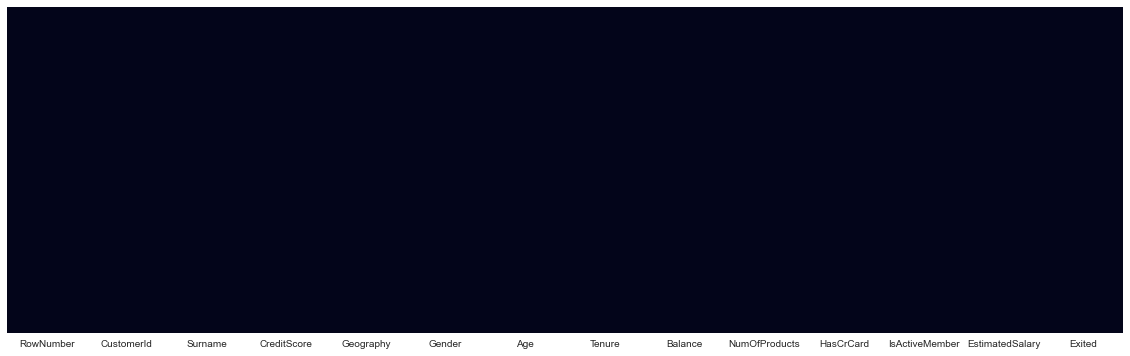

In [5]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(data.isnull(), cbar=False, yticklabels=False)

**Target Class Distribution**

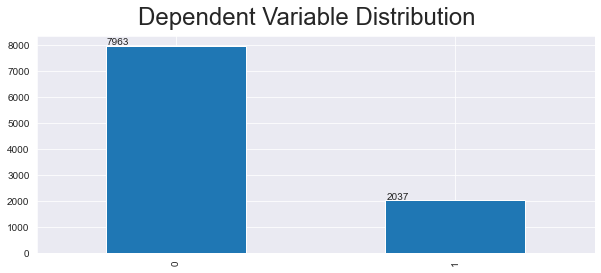

In [6]:
fig = plt.figure(figsize=(10, 4))
fig.suptitle('Dependent Variable Distribution', fontsize=24)
ax = data[DEPENDENT_VARIABLE].value_counts().plot.bar()
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
   

<AxesSubplot:xlabel='Exited'>

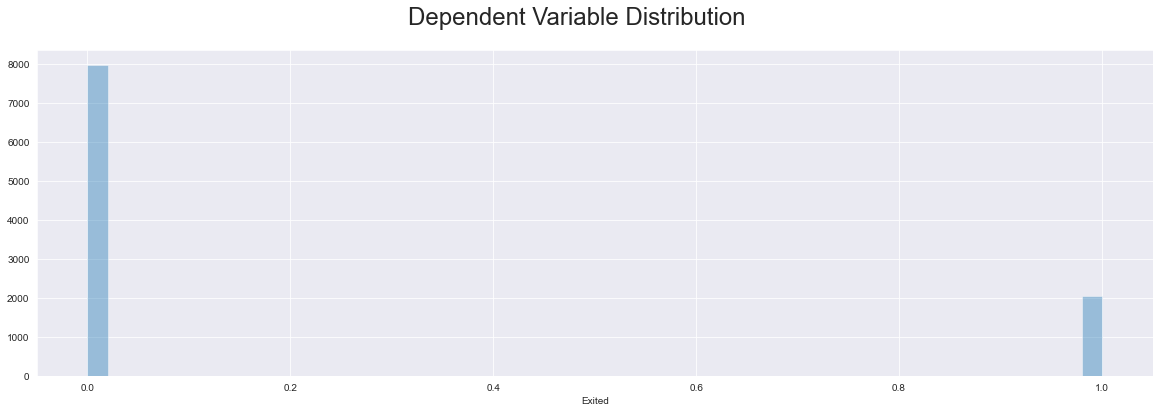

In [7]:
fig = plt.figure(figsize=(20, 6))
fig.suptitle('Dependent Variable Distribution', fontsize=24)    
sns.distplot(data[DEPENDENT_VARIABLE], kde=False) 

**Categorical Features**

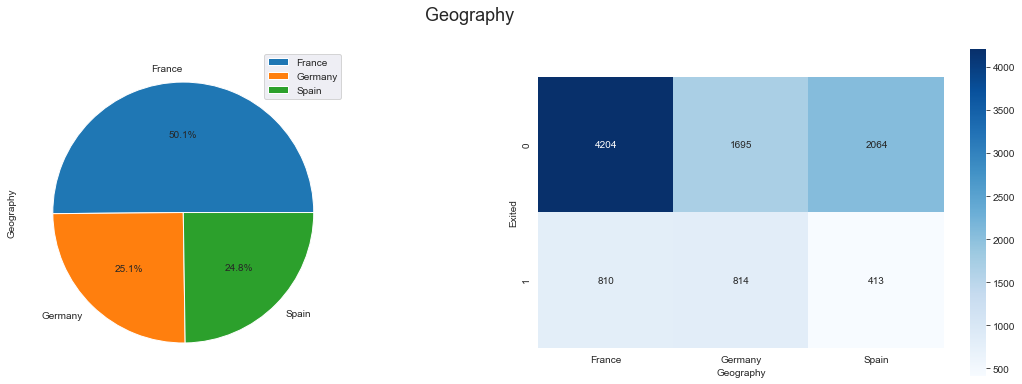

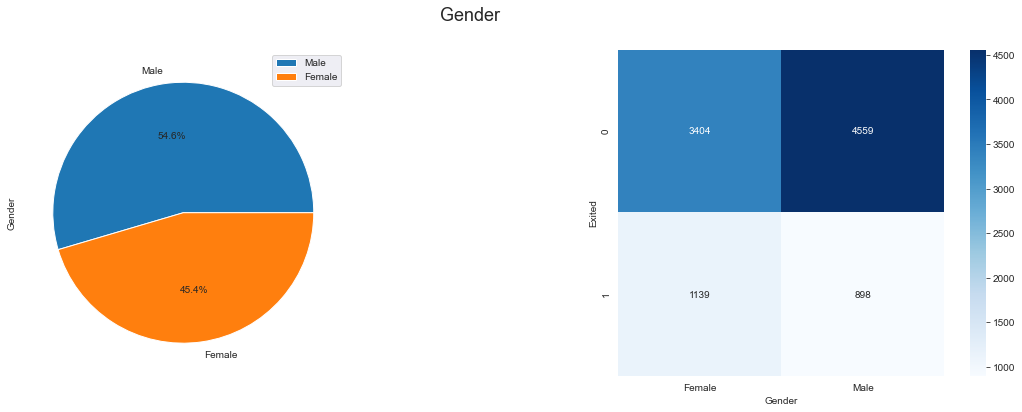

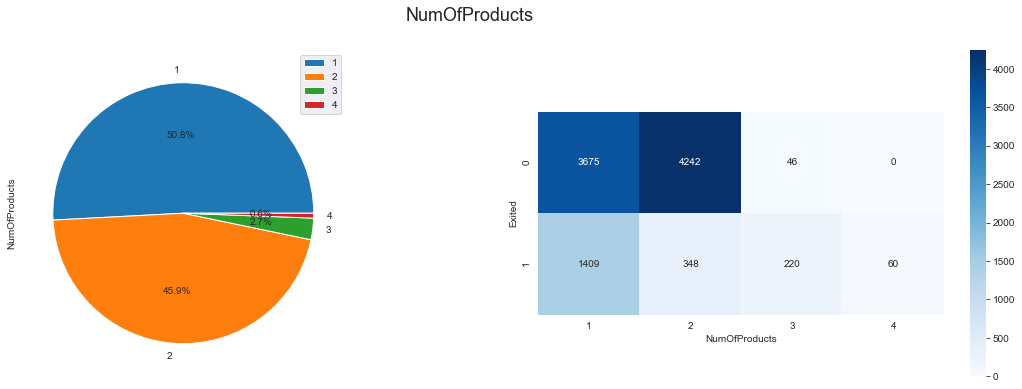

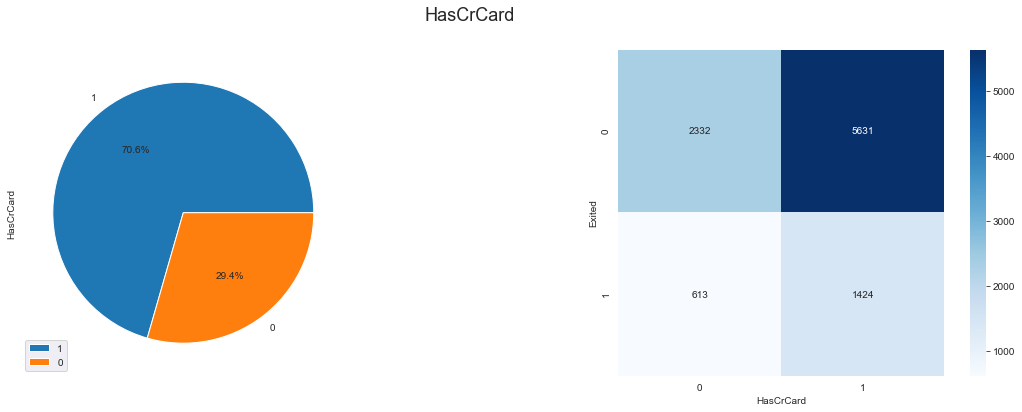

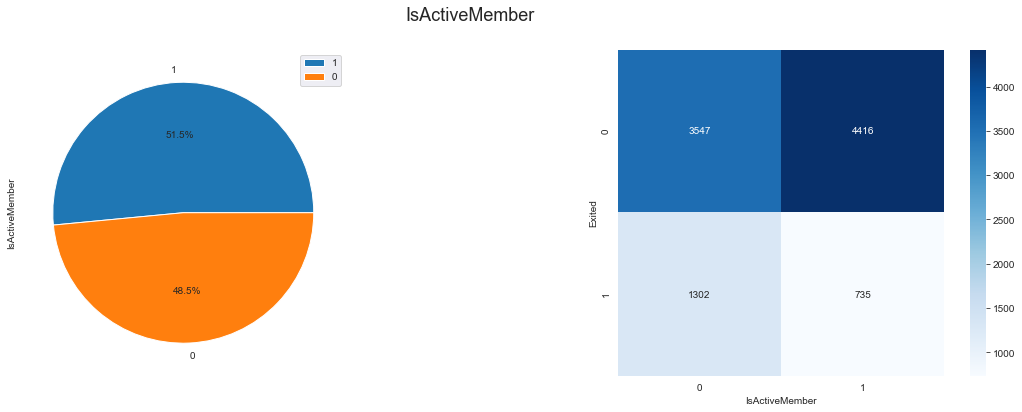

In [8]:
for col in CATEGORICAL_INDEPENDENT_VARIABLES:
    fig, ax = plt.subplots(1, 2, figsize=(20, 6))
    fig.suptitle(col, fontsize=18)
    data[col].value_counts().plot.pie(ax=ax[0], autopct="%1.1f%%")
    ax[0].legend()
    sns.heatmap(pd.crosstab(index=data[DEPENDENT_VARIABLE], columns=data[col]), ax=ax[1], cmap='Blues', annot=True, square=True, fmt='d')
    plt.show()
    
# for col in CATEGORICAL_INDEPENDENT_VARIABLES:
#     fig, ax =plt.subplots(1, 2, figsize=(20, 6))
#     fig.suptitle(col, fontsize=18)
#     data[col].value_counts().plot.pie(ax=ax[0], autopct="%1.1f%%")
#     ax[0].legend()
#     for val in data[col].unique():
#         sns.distplot(data[data[col] == val][DEPENDENT_VARIABLE], ax=ax[1], label=val, kde=False)
#     ax[1].legend()
#     plt.show()    

**Continuous Features**

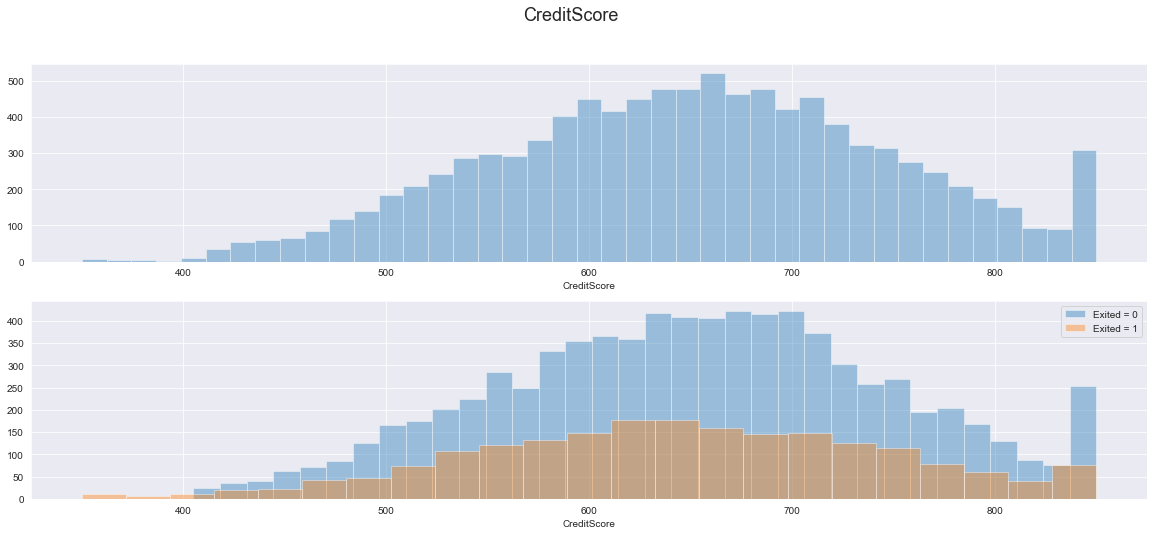

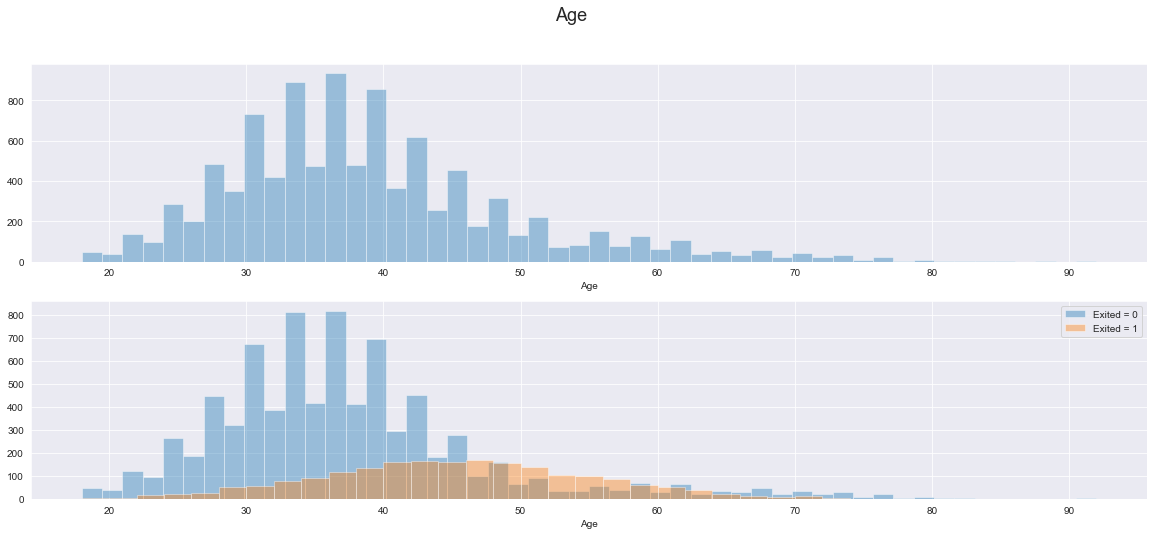

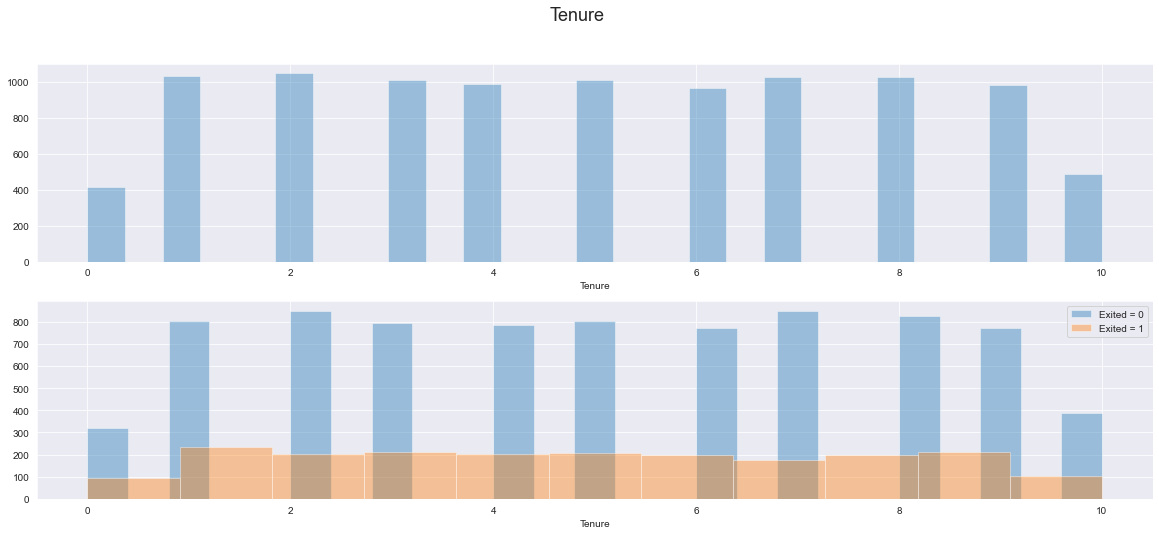

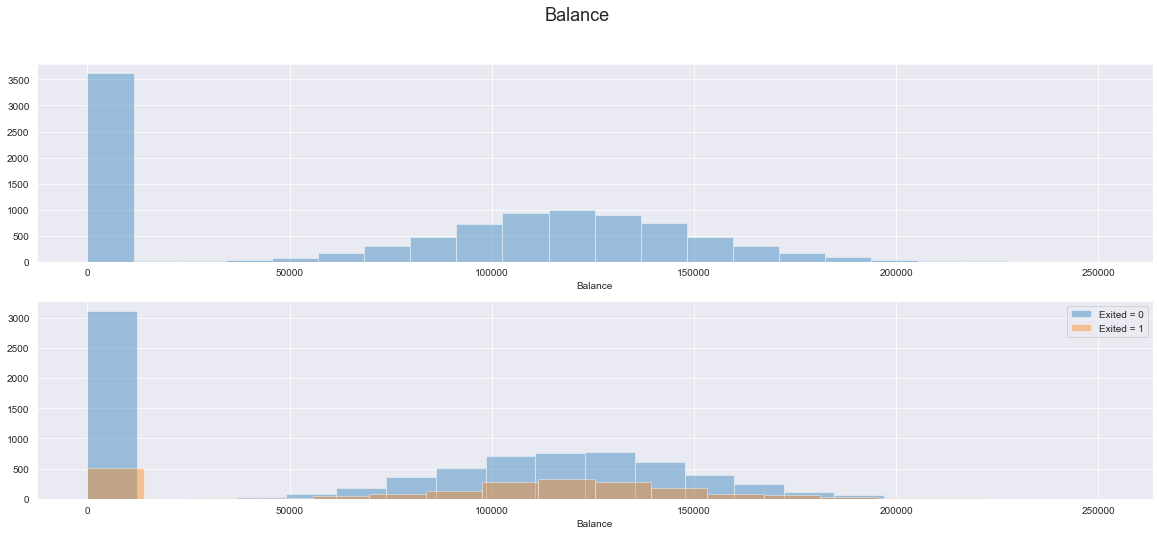

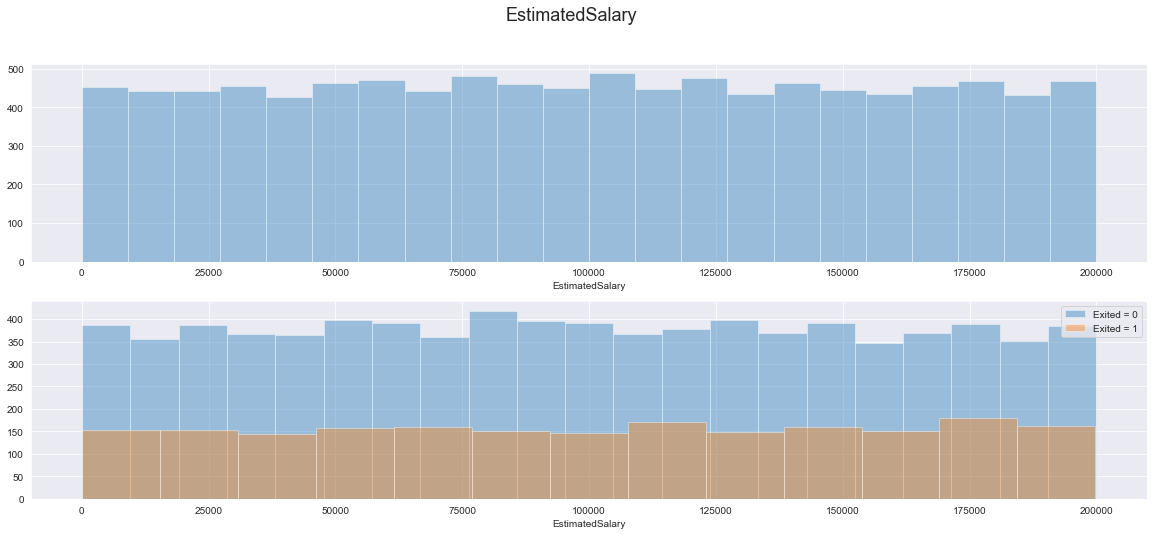

In [9]:
for col in CONTINUOUS_INDEPENDENT_VARIABLES:
    fig, ax = plt.subplots(2, 1, figsize=(20, 8))
    fig.suptitle(col, fontsize=18)
    sns.distplot(data[col], kde=False, ax=ax[0])
    for i in sorted(data[DEPENDENT_VARIABLE].unique()):
        sns.distplot(data[data[DEPENDENT_VARIABLE] == i][col], kde=False, ax=ax[1], label=f'{DEPENDENT_VARIABLE} = {i}')
    ax[1].legend()
    
# for col in CONTINUOUS_INDEPENDENT_VARIABLES:
#     fig, ax =plt.subplots(1, 2, figsize=(20, 6))
#     fig.suptitle(col, fontsize=18)
#     sns.distplot(data[col], ax=ax[0], kde=False)
#     data.plot.scatter(x=col, y=DEPENDENT_VARIABLE, ax=ax[1])
#     plt.show()    

# Preprocessing

In [10]:
X = data[CONTINUOUS_INDEPENDENT_VARIABLES+CATEGORICAL_INDEPENDENT_VARIABLES]

for col in CATEGORICAL_INDEPENDENT_VARIABLES:
    X[col] = X[col].apply(str)
    
y = data[DEPENDENT_VARIABLE]

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
CreditScore        10000 non-null int64
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
EstimatedSalary    10000 non-null float64
Geography          10000 non-null object
Gender             10000 non-null object
NumOfProducts      10000 non-null object
HasCrCard          10000 non-null object
IsActiveMember     10000 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 781.4+ KB


c:\users\rr_0124\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [11]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline

def get_column_names(feature_name, columns):
    val = feature_name.split('_')[1]
    col_idx = int(feature_name.split('_')[0][1:])
    return f'{columns[col_idx]}_{val}'

class Preprocessor():
    
    def __init__(self, return_df=True):
        self.return_df = return_df
        
        self.impute_median = SimpleImputer(strategy='median')
        self.impute_const = SimpleImputer(strategy='constant')
        self.ss = StandardScaler()
        self.ohe = OneHotEncoder(sparse=False, drop='if_binary')
        
        self.num_cols = make_column_selector(dtype_include='number')
        self.cat_cols = make_column_selector(dtype_exclude='number')
        
        self.preprocessor = make_column_transformer(
            (make_pipeline(self.impute_median, self.ss), self.num_cols),
            (make_pipeline(self.impute_const, self.ohe), self.cat_cols),
        )
        
    def fit(self, X):
        return self.preprocessor.fit(X)
        
    def transform(self, X):
        if self.return_df:
            return pd.DataFrame(
                self.preprocessor.transform(X),
                columns=self.num_cols(X)+list(map(
                    lambda x: get_column_names(x, self.cat_cols(X)),
                    self.preprocessor.transformers_[1][1][1].get_feature_names()
                ))
            )
        return X
        
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

In [12]:
X = Preprocessor().fit_transform(X)
X.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_1,IsActiveMember_1
0,-0.326221,0.293517,-1.041760,-1.225848,0.021886,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,-0.440036,0.198164,-1.387538,0.117350,0.216534,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-1.536794,0.293517,1.032908,1.333053,0.240687,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.501521,0.007457,-1.387538,-1.225848,-0.108918,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2.063884,0.388871,-1.041760,0.785728,-0.365276,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
